In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import glob
import scipy.signal as scs
from matplotlib.dates import DateFormatter
import sys
sys.path.append('d:\\gitCCA\\CESdesign\\py\\')
import CESfunctions as cf

In [ ]:
##### Spectra handling

In [ ]:
## Load files into matrices
logfolder1 = 'D:\\CCA\\Avantes\\logs10dic\\'
#logfolder1 = '/home/mixtli/Avantes/logs30nov/'

SCbg1a = cf.spectra_accumulator(logfolder1 + 'CEASbckg1aSC.npy',50)
SCbg1 = cf.spectra_accumulator(logfolder1 + 'CEASbckg1SC.npy',50)
SCbg2 = cf.spectra_accumulator(logfolder1 + 'CEASbckg2SC.npy',50)
SCln1 = cf.spectra_accumulator(logfolder1 + 'CEASline1SC.npy',50)

In [39]:
#### Cavity and spectra parameters
distance = 70

lower_wavelength=445
upper_wavelength=459

sample = SCln1
background = SCbg1

#eference1=np.load("NO2ref_AvSC_corr.npy")
reference1=cf.ref_interpolate("NO2ref_AvSC_corr.npy",sample)

In [51]:
#### Getting or setting values for Reff
Reff = 0.9996

In [68]:
#### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
I_sample=np.average(line[:,1:3],axis=1)
I_0=np.average(bckg[:,1:],axis=1)

In [52]:
#### Extinctions for testing
NO2ref = np.copy(ref1)
alpha = cf.extinction(I_sample, I_0, Reff, distance)

In [70]:
### Recursive fit: Ext -> SVD -> f(l) -> Ext-f(l) -> SVD
ndensity = cf.recursive_fit(I_sample,I_0,Reff,distance,ref1)

Primer N:  483785282327.3909  Segundo N:  392821897039.5536


In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

#ax1.plot(SCln1[:,0]*.95+22.95, alpha2,'-g',label="Ext")
ax1.plot(line[:,0]*.95+22.95, Reff,'-r',label="")

ax1.set_xlim(445,459)
ax1.set_xticks(np.arange(445,460,1))
ax1.set_ylim(.99994,1.00001)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

#ax1.plot(SCln1[:,0]*.95+22.95, alpha2,'-g',label="Ext")
ax1.plot(line[:,0]*.95+22.95, I_ratio,'-r',label="")

ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
ax1.set_ylim(1.80,2)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

(445.0, 459.0)

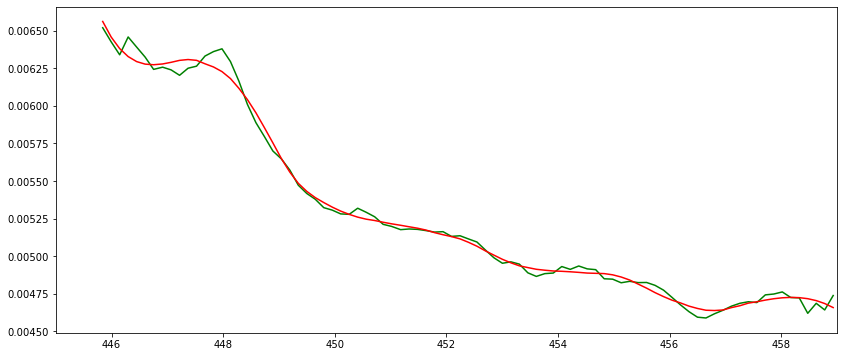

In [71]:
I_ratio=I_0/I_sample
f_c=(I_ratio-1)/70-(ref1[:,1]*(ndensity/(1-0.9994)))
f_c_sg=scs.savgol_filter(f_c, 19, 3)

f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(line[:,0]*.95+22.95, f_c,'-g',label="")
ax1.plot(line[:,0]*.95+22.95, f_c_sg,'-r',label="")
#ax1.plot(line[:,0]*.95+22.95, f_l_sg/(1-0.9994),'-b',label="")
#-NO2ref[:,1]*1.5e15
ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(0.0115,0.0135)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(bckg[:,0], bckg[:,1],'-b',label="")
ax1.plot(line[:,0], line[:,1],'-r',label="")

ax1.set_xlim(442,463)
#ax1.set_xticks(np.arange(446,459,1))
#ax1.set_ylim(0,2e5)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(no2refa[:,0],no2refa[:,1],'-b',label="")
ax1.plot(no2[:,0], no2[:,1],'-r',label="")

ax1.set_xlim(442,463)
#ax1.set_xticks(np.arange(446,459,1))
#ax1.set_ylim(0,2e5)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

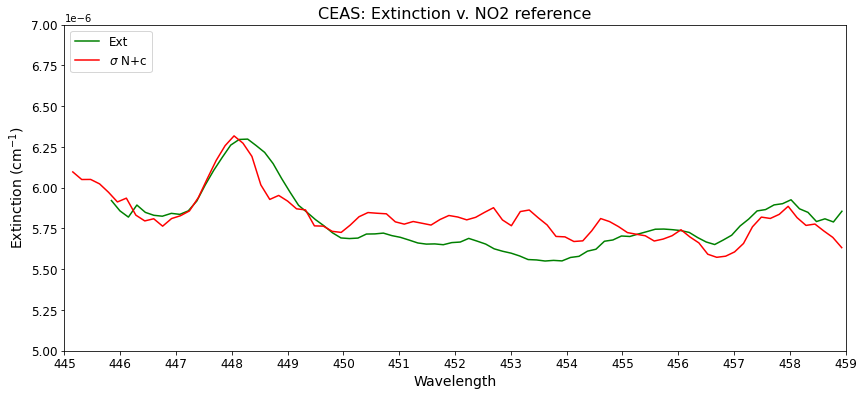

In [60]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(line[:,0]*.95+22.95, alpha,'-g',label="Ext")
ax1.plot(NO2ref[:,0], NO2ref[:,1]*12.5e11-.000000014*NO2ref[:,0]+11.585e-6,'-r',label="$\sigma$ N+c")

ax1.set_xlim(445,459)
ax1.set_xticks(np.arange(445,460,1))
ax1.set_ylim(5e-6,7e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
I_ratio=I_0/I_sample
f_c=(I_ratio-1)/70-(ref1[:,1]*(c/(1-0.9994)))
f_c_sg=scs.savgol_filter(f_c, 19, 3)

f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(line[:,0]*.95+22.95, f_c,'-g',label="")
ax1.plot(line[:,0]*.95+22.95, f_c_sg,'-r',label="")
#-NO2ref[:,1]*1.5e15
ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(0.0115,0.0135)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Wavelength',size=14)
#ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
#ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
#ax1.legend(fontsize=12, loc='upper left')
#ax1.tick_params(labelsize=12)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [ ]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(ref_NO2_static[:,0], ext_NO2,'-g',label="Ext")
ax1.plot(ref_NO2_static[:,0], x_hat_NO2[2,0]*ref_NO2[:,1]+x_hat_NO2[1,0]*ref_NO2[:,0]*x_hat_NO2[0,0]+7.8e-6,'-r',label="SVD iter #1")

ax1.set_xlim(445,459)
ax1.set_xticks(np.arange(445,460,1))
ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Wavelength',size=14)
ax1.set_ylabel('Extinction (cm$^{-1}$)',size=14)
ax1.set_title("CEAS: Extinction v. NO2 reference",size=16)
ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
#plt.savefig('BBCEASext_v_ref.png')

In [61]:
#### BIG DATA TEST
logfolder1 = 'D:\\CCA\\Avantes\\logs23dic\\'
SCbg1 = cf.spectra_accumulator(logfolder1 + 'CEASbckg1SC.npy',50)
SCln1 = cf.spectra_accumulator(logfolder1 + 'CEASline1SC.npy',50)
SCbg2 = cf.spectra_accumulator(logfolder1 + 'CEASbckg2SC.npy',50)
SCln2 = cf.spectra_accumulator(logfolder1 + 'CEASline2SC.npy',50)

In [ ]:
SClnavg = cf.spectra_average(SCln,10)

In [63]:
#### Cavity and spectra parameters
distance = 70

lower_wavelength=445
upper_wavelength=459

sample = SCln1
background = SCbg1

#reference1=np.load("NO2ref_AvSC_corr.npy")
reference1=cf.ref_interpolate("NO2ref_AvSC_corr.npy",sample)
#### Getting or setting values for Reff
Reff = 0.9996
#### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
I_0=np.average(bckg[:,1:],axis=1)
densities = []

t_0=dt.datetime.fromtimestamp(0.0)
t_i=dt.datetime(year=2021,month=12,day=23,hour=11,minute=53)
t_f=dt.datetime(year=2021,month=12,day=24,hour=0)
initial = (t_i-t_0).total_seconds()
final = (t_f-t_0).total_seconds()
seconds = np.linspace(initial,final,num=len(line.T[:,0])-1)
timelist=[]
for ele in seconds:
    timelist.append(dt.datetime.fromtimestamp(ele))
time = np.array(timelist)

In [64]:
for i in range(1,len(line.T[:,0])):
    I_sample=np.copy(line[:,i])
    ndensity = cf.recursive_fit(I_sample,I_0,Reff,distance,ref1,verbose=0)
    densities.append(ndensity)
conc = np.array(densities)

In [65]:
#### Cavity and spectra parameters
distance = 70

lower_wavelength=445
upper_wavelength=459

sample = SCln2
background = SCbg1

#reference1=np.load("NO2ref_AvSC_corr.npy")
reference1=cf.ref_interpolate("NO2ref_AvSC_corr.npy",sample)

#### Getting or setting values for Reff
Reff = 0.9996
#### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
I_0=np.average(bckg[:,1:],axis=1)
densities = []

t_0=dt.datetime.fromtimestamp(0.0)
t_i=dt.datetime(year=2021,month=12,day=24,hour=0,minute=1)
t_f=dt.datetime(year=2021,month=12,day=24,hour=9,minute=56)
initial = (t_i-t_0).total_seconds()
final = (t_f-t_0).total_seconds()
seconds = np.linspace(initial,final,num=len(line.T[:,0])-1)
timelist=[]
for ele in seconds:
    timelist.append(dt.datetime.fromtimestamp(ele))
time2 = np.array(timelist)

In [66]:
for i in range(1,len(line.T[:,0])):
    I_sample=np.copy(line[:,i])
    ndensity = cf.recursive_fit(I_sample,I_0,Reff,distance,ref1,verbose=0)
    densities.append(ndensity)
conc2 = np.array(densities)

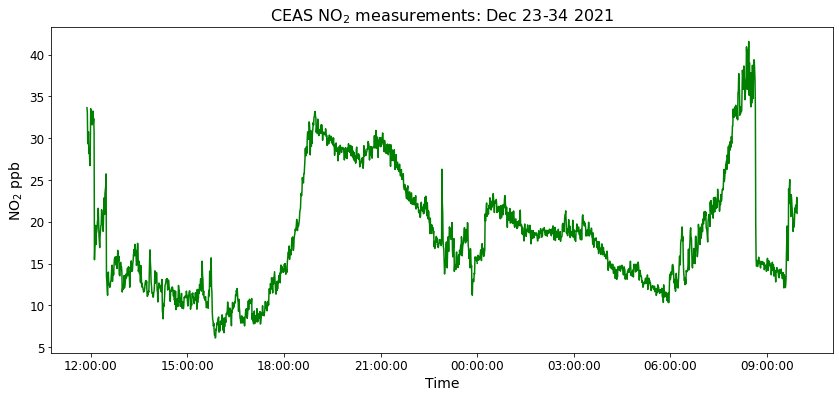

In [67]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(time, conc/2.5e10,'-g',label="Ext")
ax1.plot(time2, conc2/2.5e10,'-g',label="Ext")
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax1.set_title("CEAS NO$_2$ measurements: Dec 23-34 2021",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax1.text(0.05, 0.95, 'N=9E10 molecule*$cm^{-3}$ (~4ppb)\n c=5.15E-7', transform=ax0.transAxes, fontsize=14,verticalalignment='top', bbox=props)
plt.savefig('BBCEAS2324dic.png')

In [3]:
#### Cavity and spectra parameters
distance = 70

lower_wavelength=447
upper_wavelength=450.5

sample = np.load('Isample2201211428.npy')
background = np.load('Ibackground2201211230.npy')
measurements = np.load('measurements2201211428.npy',allow_pickle=True)

reference1=np.load("NO2_AvSC_corr.npy")
#reference1=cf.ref_interpolate("NO2_AvSC_corr.npy",sample)
#### Getting or setting values for Reff
Reff = 0.9994
#### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
I_0=np.average(bckg[:,1:],axis=1)

densities = []


for i in range(1,len(line.T[:,0])):
    I_sample=np.copy(line[:,i])
    ndensity = cf.recursive_fit(I_sample,I_0,Reff,distance,ref1,verbose=0)
    densities.append(ndensity)
conc = np.array(densities)

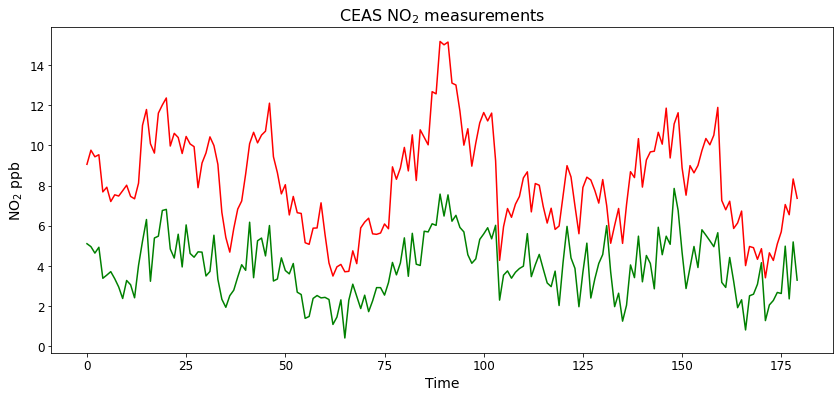

In [6]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(np.arange(len(conc)), conc/2.5e10,'-g',label="Peak")
ax1.plot(np.arange(len(conc)), measurements[:,1],'-r',label="Full range")
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
ax1.set_xlabel('Time',size=14)
ax1.set_ylabel('NO$_2$ ppb',size=14)
ax1.set_title("CEAS NO$_2$ measurements",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
#ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))

In [10]:
print(reference1.shape)
print(sample.shape)

(3647, 2)
(3648, 181)


In [25]:
print(line.shape,ref1.shape)
print(line[:,0])
print(ref1[:,0])

(22, 181) (22, 2)
[447.67346497 447.82584534 447.97822571 448.13066406 448.28304443
 448.43539581 448.58777618 448.74009857 448.89247894 449.04483032
 449.19715271 449.34950409 449.50182648 449.65414886 449.80647125
 449.95876465 450.11105804 450.26338043 450.41561584 450.56790924
 450.72014465 450.87243805]
[447.676 447.828 447.98  448.132 448.284 448.436 448.588 448.74  448.892
 449.044 449.196 449.348 449.5   449.652 449.804 449.956 450.108 450.26
 450.412 450.564 450.716 450.868]


In [16]:
chocho= np.loadtxt("CHOCHO_ref.txt")

In [22]:
np.save("CHOCHO_AvSC_corr",reference2)

In [19]:
reference2=cf.ref_interpolate("CHOCHO.npy",reference1)

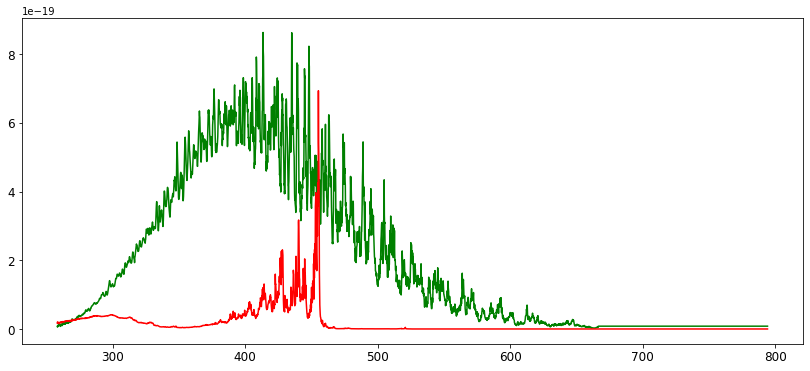

In [23]:
f, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(reference1[:,0], reference1[:,1],'-g',label="NO2")
ax1.plot(reference2[:,0], reference2[:,1],'-r',label="CHOCHO")
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Time',size=14)
#ax1.set_ylabel('NO$_2$ ppb',size=14)
#ax1.set_title("CEAS NO$_2$ measurements",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
#ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))

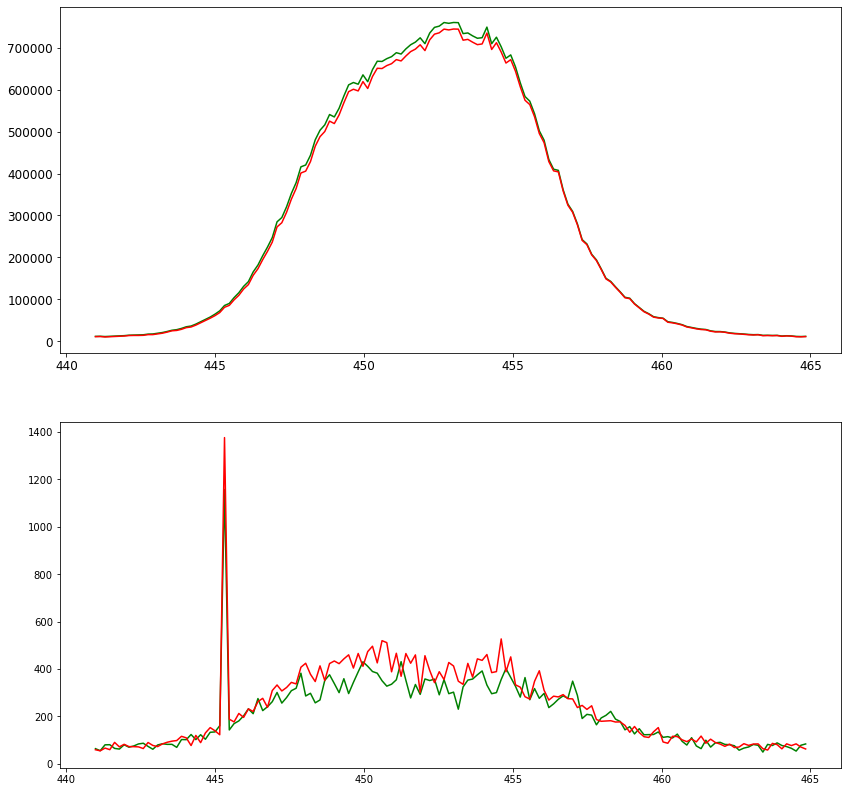

In [7]:
bg1=np.loadtxt("E:\\Ib2202031134.txt")
bg2=np.loadtxt("E:\\Ib2202031441.txt")

f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.plot(bg1[1175:1325,0], np.average(bg1[1175:1325,1:],axis=1),'-g',label="NO2")
ax1.plot(bg2[1175:1325,0], np.average(bg2[1175:1325,1:],axis=1),'-r',label="CHOCHO")

ax2.plot(bg1[1175:1325,0], np.std(bg1[1175:1325,1:],axis=1),'-g',label="NO2")
ax2.plot(bg2[1175:1325,0], np.std(bg2[1175:1325,1:],axis=1),'-r',label="CHOCHO")

#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Time',size=14)
#ax1.set_ylabel('NO$_2$ ppb',size=14)
#ax1.set_title("CEAS NO$_2$ measurements",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
#ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))

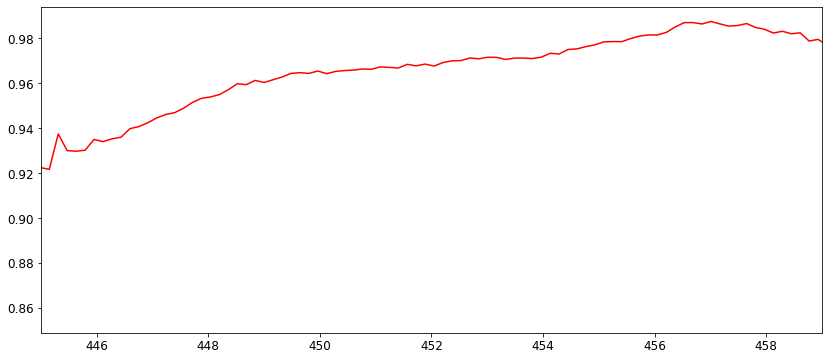

In [14]:
ratio=np.average(bg2[1175:1325,1:],axis=1)/np.average(bg1[1175:1325,1:],axis=1)
f, ax1 = plt.subplots(figsize=(14,6))

#ax1.plot(bg1[1175:1325,0], np.average(bg1[1175:1325,1:],axis=1),'-g',label="NO2")
ax1.plot(bg2[1175:1325,0], ratio,'-r',label="CHOCHO")
ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Time',size=14)
#ax1.set_ylabel('NO$_2$ ppb',size=14)
#ax1.set_title("CEAS NO$_2$ measurements",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
#ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))

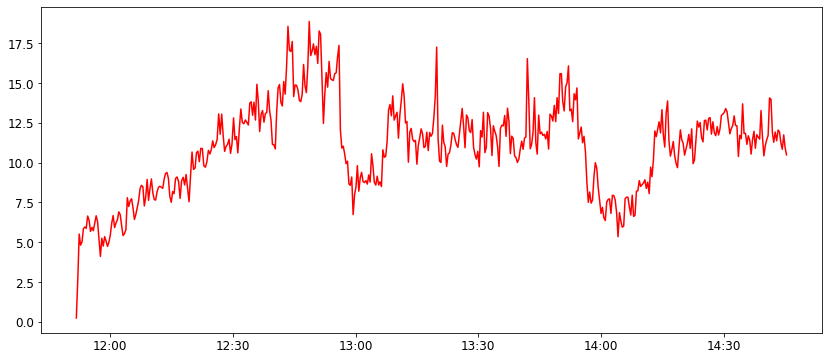

In [13]:
with open("E:\\M2201251445.txt") as f:
    lines = f.readlines()

data=[]

for line in lines:
    a=line.strip('\n')
    data.append(a.split(' '))

dates=[]
ppbs=[]
    
for ele in data:
    dates.append(dt.datetime.strptime(ele[0],"%Y/%m/%d-%H:%M:%S"))
    ppbs.append(float(ele[1]))
    
f, ax1 = plt.subplots(figsize=(14,6))
#ax1.plot(bg1[1175:1325,0], np.average(bg1[1175:1325,1:],axis=1),'-g',label="NO2")
ax1.plot(dates, ppbs,'-r',label="CHOCHO")
#ax1.set_xlim(445,459)
#ax1.set_xticks(np.arange(445,460,1))
#ax1.set_ylim(7e-6,9e-6)
#ax1.set_xticks(np.arange(440,466,2))
#ax1.set_xlabel('Time',size=14)
#ax1.set_ylabel('NO$_2$ ppb',size=14)
#ax1.set_title("CEAS NO$_2$ measurements",size=16)
#ax1.legend(fontsize=12, loc='upper left')
ax1.tick_params(labelsize=12)
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M"))

In [41]:
print(np.trapz(np.average(bg1[1175:1325,1:],axis=1)),np.trapz(np.average(bg2[1175:1325,1:],axis=1)))

41572248.08333333 40191284.96666667


(2e-06, 2.4e-06)

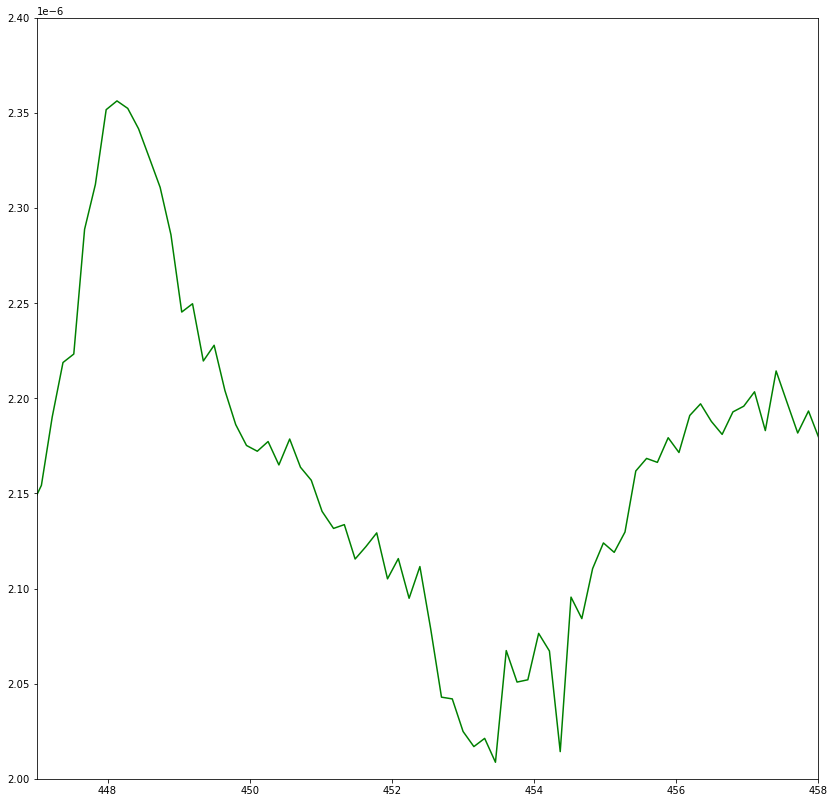

In [12]:
bg1=np.loadtxt("E:\\Ib2202031134.txt")
savedspectra = np.load('E:\\Isamples2202031429.npy')
ref=np.load("NO2ref_AvSC_corr.npy")
alpha = cf.extinction(savedspectra[:,81], np.average(bg1[:,1:],axis=1), 0.99955, 70)
f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(111)

ax1.plot(ref[:,0], alpha[:-1],'-g',label="NO2")
ax1.set_xlim(447,458)
ax1.set_ylim(2e-6,2.4e-6)